<a href="https://colab.research.google.com/github/yustinaivanova/math_netology/blob/master/dz_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание 3. Математика для data sciense. Нетология.

Решить систему линейных уравнений:

![alt text](https://italiandirectory.eu/wp-content/ql-cache/quicklatex.com-34a5602e13176cbddcfd35cca34478fe_l3.svg)

In [98]:
import numpy as np

A = np.array([
    [2, 1, 1],
    [1, 3, 2],
    [1, 0, 0],
])

B = [4, 5, 6]

if np.linalg.det(A) != 0:
    a, b, c = np.linalg.solve(A, B)
    print(f'a = {round(a)}, b = {round(b)}, c = {round(c)}')

else:
    print('det(A) = 0')


a = 6.0, b = 15.0, c = -23.0


Анна выбирает тарифный план для телефонной связи. Первый план, T1, стоит 20 долларов в месяц, каждый звонок стоит 25 центов в минуту. Второй тарифный план, T2, стоит 40долларов в месяц, но звонки стоят 8 центов в минуту. Какой план ей выбрать, если Анна звонит не более 117 минут в месяц?

Составим задачу в системе линейных уравнений. 

Количество минут - независимая переменная, будет нашим x. Стоимость тарифа - зависимая величина, будет нашим y. 

Написать систему уравнений для данной задачи, построить график, найти точку пересечения прямых. 
Сделать вывод о том, какой тариф использовать лучше для Анны.

**Решение:**

\begin{equation*}
    \left\{
        \begin{array}{ll}
            T_1 = 0.25x + 20\\
            T_2 = 0.08x + 40\\
        \end{array}
    \right.
\end{equation*} 

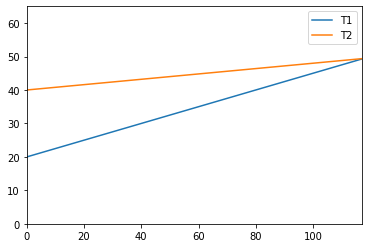

In [99]:
import numpy as np
import matplotlib.pyplot as plt

max_minutes = 117
x = np.arange(0, max_minutes + 1)

y1 = .25 * x + 20
y2 = .08 * x + 40 

plt.figure()
plt.plot(x, y1)
plt.plot(x, y2)
plt.xlim(0, max_minutes)
plt.ylim(0, 65)

plt.legend(['T1','T2'])
plt.show()
plt.close()

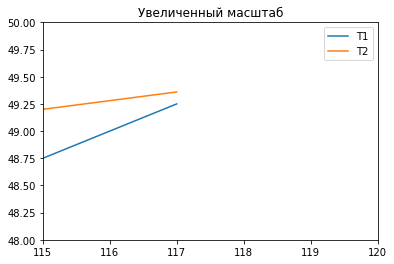

In [102]:
plt.figure()
plt.plot(x, y1)
plt.plot(x, y2)
plt.xlim(115, 120)
plt.ylim(48, 50)

plt.title('Увеличенный масштаб')
plt.legend(['T1','T2'])
plt.show()
plt.close()

**Вывод:**

Тариф T1 выгоднее

Загрузить датасет Boston houses. 
Выбрать 3-хмерное пространство (3 атрибута из таблицы), взять 3 дома по данному трехмерному пространству, доказать, что данные векторы не компланарны.

In [57]:
import numpy as np
from sklearn.datasets import load_boston

def get_vectors(data, count, size):
    return list(map(lambda i: data[i][:size], range(count)))

ds = load_boston().data
A = get_vectors(ds, 3, 3)
A_det = np.linalg.det(A)

if A_det:
    print('Векторы не компланарны')
else:
    print('Векторы компланарны')

Векторы не компланарны


Для матрицы, полученной на предыдущей задачи, посчитать собственный вектор(v). Умножить собственный вектор на матрицу (Av). Сделать график. Во сколько раз Av отличается от v?

In [76]:
eig_values, eig_vectors = np.linalg.eig(A)
v = eig_vectors[0]
Av = np.array(A).dot(v)

print('v:', v)
print('Av:', Av)

v: [-0.89540758 -0.99998438 -0.99999246]
Av: [-20.31536033  -7.09440026  -7.09438235]


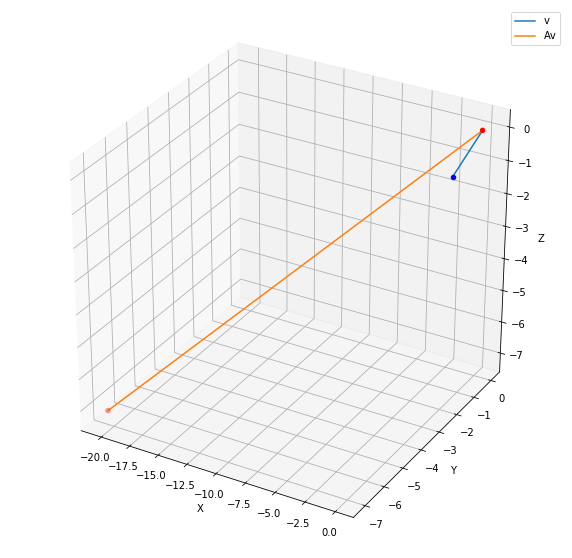

In [77]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

figure = plt.figure(figsize=(10, 10))
ax = figure.gca(projection='3d')

ax.plot( [0, v[0]], [0, v[1]], [0, v[2]] )
ax.scatter( v[0], v[1], v[2], c='b', marker='o' )

ax.plot( [0, Av[0]], [0, Av[1]], [0, Av[2]],)
ax.scatter( [0, Av[0]], [0, Av[1]], [0, Av[2]], c='r', marker='o' )

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.legend(['v', 'Av'])

plt.show()
plt.close()

In [94]:
class VectorData:
    def __init__(self, name: str, length: float):
        self.name = name
        self.length = length

Av_data = VectorData(name='Av', length=np.linalg.norm(Av))
v_data = VectorData(name='v', length=np.linalg.norm(v))

short_vec, long_vec = sorted([Av_data, v_data], key=lambda vec: vec.length)

print(f'Вектор {long_vec.name} длиннее вектора {short_vec.name} в {long_vec.length / short_vec.length} раз')

Вектор Av длиннее вектора v в 13.536479811379758 раз


Задание повышенного уровня.

Как посчитать интеграл полинома, полученного в домашнем задании №2, при полиномиальной регрессии?

In [151]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from numpy import linalg as LA
import numpy as np
import pandas as pd

boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
price = boston_dataset.target
degree = 4
  
x = boston.LSTAT
x = np.array(x).reshape(-1, 1)
y = price

poly = PolynomialFeatures(degree=degree) 
X_poly = poly.fit_transform(x)
  
poly.fit(X_poly, y) 
lin2 = LinearRegression()
model = lin2.fit(X_poly, y)

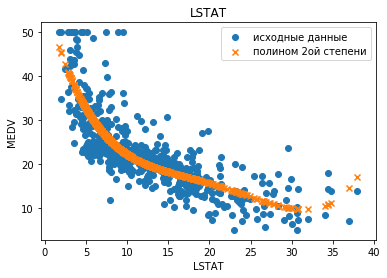

In [152]:
y_pred = model.predict(poly.fit_transform(x))
plt.scatter(x, y, marker='o')
plt.scatter(x, y_pred, marker='x')
plt.title('LSTAT')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.legend(['исходные данные', 'полином 2ой степени'])
plt.show()

In [158]:
import scipy.integrate as spint

def f(x):
    return x ** degree

a = min(x)
b = max(x)

spint.quad(f, a, b)

(15784575.112376932, 1.752439872368609e-07)